# Hands on Decision Trees


### 1.) Download the Iris dataset via sklearn and split it into a training and test set.

In [20]:
from sklearn import datasets

iris = datasets.load_iris()

Visualizing the data 

In [21]:
#converting dataset into dataframe 

import pandas as pd
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = iris.target
iris_df.head(10)
unique_values = iris_df['target'].unique()
print("Unique values in target column:", unique_values)

Unique values in target column: [0 1 2]


In [22]:
iris_df.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
dtype: object

In [23]:
iris_df.describe
iris_df.shape

(150, 5)

In [24]:
from sklearn.model_selection import train_test_split
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (120, 4)
Testing features shape: (30, 4)
Training target shape: (120,)
Testing target shape: (30,)


### 2.) Train a Decision Tree on the training set and evaluate it on the test set.
This means using the DecisionTreeClassifier from sklearn and training it on the training set and then evaluating it on the test set. Try some hyperparameter tuning and visualize the performance based on one of the hyperparameters. (size of the tree)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)




Training Accuracy: 1.0
Testing Accuracy: 1.0


Generalizing or Overfitting ? Perfect score. Need to check if the score is as good as it looks with cross validation

In [26]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.96666667 0.96666667 0.9        1.         1.        ]
Mean cross-validation score: 0.9666666666666668


A mean cross-validation score of 96% indicates that the model has learned meaningful patterns in the data without being overly complex (as seen by the stable cross-validation scores).

Now we will try to adjust some of the hyperparameters of the tree to see if we can achieve a similar high score but with less computational needs 

In [27]:
#checking current paramethers settings 
print(clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}


In [28]:
#Playing with the parameters 

param_combinations = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 5, 10],
    "criterion": ["gini", "entropy"]
}
results = []
for max_depth in param_combinations["max_depth"]:
    for min_samples_split in param_combinations["min_samples_split"]:
        for min_samples_leaf in param_combinations["min_samples_leaf"]:
            for criterion in param_combinations["criterion"]:
                
                clf = DecisionTreeClassifier(
                    max_depth=max_depth,
                    min_samples_split=min_samples_split,
                    min_samples_leaf=min_samples_leaf,
                    criterion=criterion,
                    random_state=42
                )
                clf.fit(X_train, y_train)

                # Calculating accuracy on the test set
                y_test_pred = clf.predict(X_test)
                test_accuracy = accuracy_score(y_test, y_test_pred)

                # Storing the results
                results.append({
                    "max_depth": max_depth,
                    "min_samples_split": min_samples_split,
                    "min_samples_leaf": min_samples_leaf,
                    "criterion": criterion,
                    "test_accuracy": test_accuracy
                })

# Converting results to a DataFrame
results_df = pd.DataFrame(results)

# Displaying results sorted by accuracy
results_df = results_df.sort_values(by="test_accuracy", ascending=False)
print(results_df.sort_values(by="test_accuracy", ascending=False))



    max_depth  min_samples_split  min_samples_leaf criterion  test_accuracy
0         3.0                  2                 1      gini       1.000000
67        NaN                 10                 1   entropy       1.000000
69        NaN                 10                 5   entropy       1.000000
31        5.0                 10                 1   entropy       1.000000
36       10.0                  2                 1      gini       1.000000
..        ...                ...               ...       ...            ...
64        NaN                  5                10      gini       0.966667
4         3.0                  2                10      gini       0.966667
10        3.0                  5                10      gini       0.966667
5         3.0                  2                10   entropy       0.966667
71        NaN                 10                10   entropy       0.966667

[72 rows x 5 columns]


In [ ]:
#choosing the best scores with the less parameters 
perfect_trees = results_df[results_df["test_accuracy"] == 1.0]
simplest_trees = perfect_trees.sort_values(
    by=["max_depth", "min_samples_split", "min_samples_leaf"], 
    ascending=[True, True, True]
)
print(simplest_trees)

    max_depth  min_samples_split  min_samples_leaf criterion  test_accuracy
0         3.0                  2                 1      gini            1.0
1         3.0                  2                 1   entropy            1.0
3         3.0                  2                 5   entropy            1.0
2         3.0                  2                 5      gini            1.0
7         3.0                  5                 1   entropy            1.0
6         3.0                  5                 1      gini            1.0
9         3.0                  5                 5   entropy            1.0
8         3.0                  5                 5      gini            1.0
13        3.0                 10                 1   entropy            1.0
12        3.0                 10                 1      gini            1.0
14        3.0                 10                 5      gini            1.0
15        3.0                 10                 5   entropy            1.0
18        5.

We choose first 3 trees and will plot them 

### 3.) Visualize the Decision Tree
use the `plot_tree` function from isklearn.tree` to visualize the decision tree.
Which attributes are the most important ones and used for the first splits?

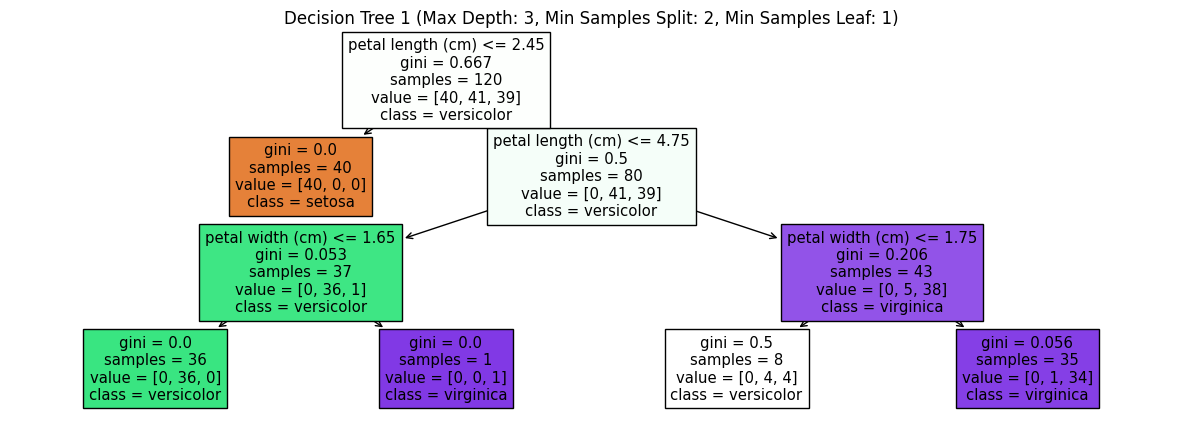

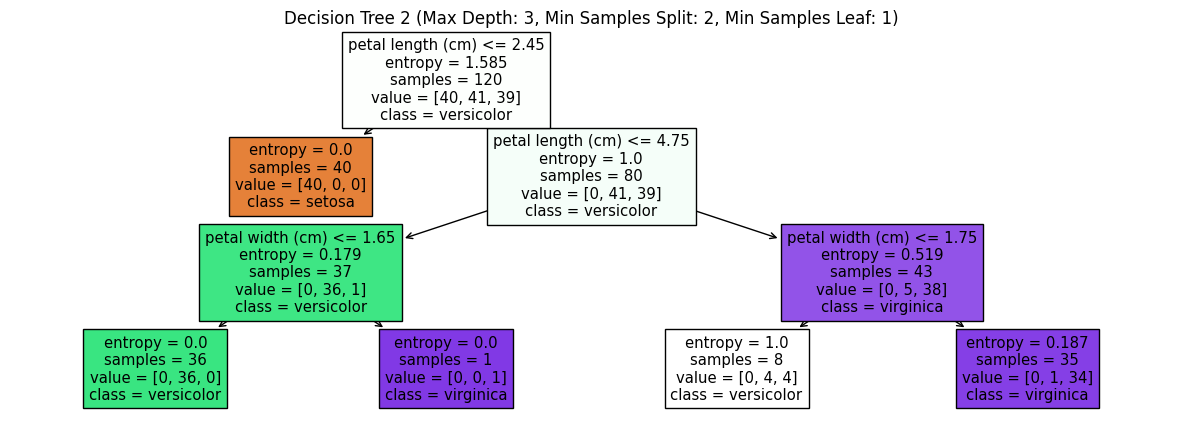

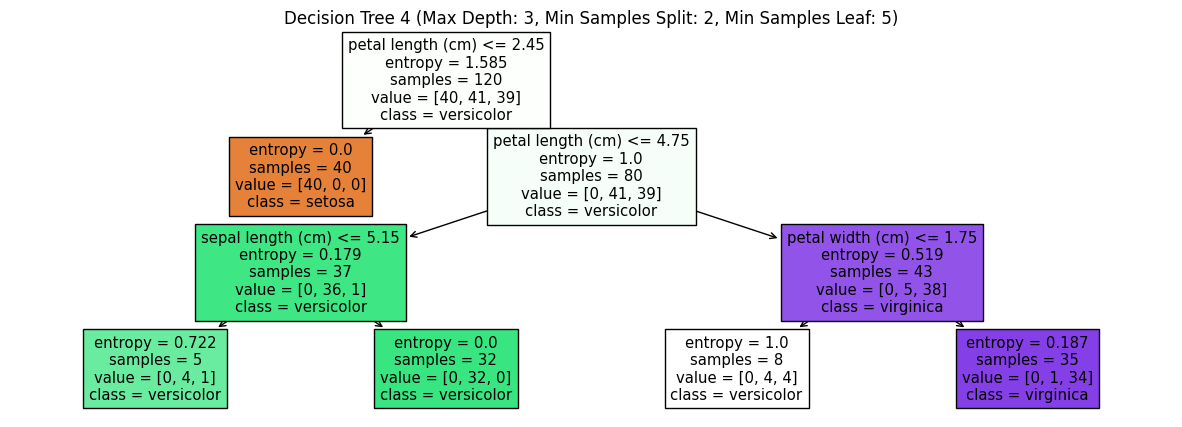

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

top_3_trees = simplest_trees.head(3)
for idx, row in top_3_trees.iterrows():
    max_depth = int(row["max_depth"])
    min_samples_split = row["min_samples_split"]
    min_samples_leaf = row["min_samples_leaf"]
    criterion = row["criterion"]
    clf = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        random_state=42
    )
    clf.fit(X_train, y_train)
    plt.figure(figsize=(15, 5))
    plot_tree(
        clf, 
        feature_names=X_train.columns, 
        class_names=["setosa", "versicolor", "virginica"], 
        filled=True
    )
    plt.title(f"Decision Tree {idx+1} (Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf})")
    plt.show()


### 4.) Optional: Implement the Decision Tree Algorithm from scratch

### Pseudo Code for the ID3 Algorithm
```
def ID3(D, A):
  if D is pure or A is empty:
    return a leaf node with the majority class in D
  else:
    A_best = argmax(InformationGain(D, A))
    root = Node(A_best)
    for v in values(A_best):
      D_v = subset(D, A_best, v)
      child = ID3(D_v, A - {A_best})
      root.add_child(v, child)
    return root
```

In [29]:
from collections import Counter
import numpy as np
# Function to calculate entropy
def entropy(y):
    """Calculate the entropy of a dataset."""
    class_counts = Counter(y)
    total = len(y)
    return -sum((count / total) * np.log2(count / total) for count in class_counts.values())

# Function to calculate information gain
def information_gain(D, feature, target):
    base_entropy = entropy(D[target])
    values = D[feature].unique()
    weighted_entropy = 0
    for value in values:
        subset = D[D[feature] == value]
        weighted_entropy += (len(subset) / len(D)) * entropy(subset[target])
    
    # Information Gain
    return base_entropy - weighted_entropy

class Node:
    """Class to represent a node in the decision tree."""
    def __init__(self, feature=None, value=None, children=None, label=None):
        self.feature = feature
        self.value = value
        self.children = children if children else {}
        self.label = label

    def is_leaf(self):
        return self.label is not None

def id3(D, features, target):
    if len(D[target].unique()) == 1:
        return Node(label=D[target].iloc[0])  # Return a leaf node with the pure class
    if not features:
        # Return a leaf node with the majority class
        majority_class = D[target].mode()[0]
        return Node(label=majority_class)

    # Find the best feature to split on
    gains = {feature: information_gain(D, feature, target) for feature in features}
    best_feature = max(gains, key=gains.get)

    # Create the root node for this feature
    root = Node(feature=best_feature)

    # Split the dataset and recurse for each unique value of the feature
    for value in D[best_feature].unique():
        subset = D[D[best_feature] == value]
        remaining_features = [f for f in features if f != best_feature]
        root.children[value] = id3(subset, remaining_features, target)

    return root

# Function to print the tree
def print_tree(node, depth=0):
    """Recursively print the decision tree."""
    if node.is_leaf():
        print("\t" * depth + f"Leaf: {node.label}")
    else:
        print("\t" * depth + f"[Feature: {node.feature}]")
        for value, child in node.children.items():
            print("\t" * (depth + 1) + f"Value: {value}")
            print_tree(child, depth + 2)

# Testing the ID3 implementation
# Example dataset (Iris Dataset for simplicity)
data = pd.DataFrame({
    'sepal_length': [5.1, 4.9, 4.7, 6.1, 6.5],
    'sepal_width': [3.5, 3.0, 3.2, 3.0, 3.0],
    'petal_length': [1.4, 1.4, 1.3, 5.0, 5.5],
    'petal_width': [0.2, 0.2, 0.2, 1.8, 2.2],
    'class': ['setosa', 'setosa', 'setosa', 'versicolor', 'virginica']
})

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'class'

# Build the decision tree
tree = id3(data, features, target)

# Print the tree
print_tree(tree)


[Feature: sepal_length]
	Value: 5.1
		Leaf: setosa
	Value: 4.9
		Leaf: setosa
	Value: 4.7
		Leaf: setosa
	Value: 6.1
		Leaf: versicolor
	Value: 6.5
		Leaf: virginica
